# Comparing NYPD complaint and arrest datasets for sexual assualts
* **NYPD_Complaint_Data_Historic_CLEAN_SA** = This dataset contains all sexual assault related crimes reported to the New York City Police Department from 2006 to 2019. 
* **NYPD_Arrests_Data_Historic_CLEAN_SA** = This dataset contains all sexual assault related arrests made by the New York City Police Department from 2006 to 2019. 

### Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### How do the number of sexual assault complaints and arrests compare?

In [2]:
complaints_df = pd.read_csv('../data/clean/NYPD_Complaint_Data_Historic_CLEAN_SA.csv')
arrests_df = pd.read_csv('../data/clean/NYPD_Arrests_Data_Historic_CLEAN_SA.csv')

1. Create a DateTimeIndex
2. Drop rows with missing data in start_date column
3. Drop any rows where year < 2006
4. Create a new dataframe with the year and number of complaints/arrests
5. Rename columns
6. Merge data frames

In [3]:
arrests_df['arrest_date']

0        07/31/2015
1        06/23/2015
2        06/30/2015
3        07/12/2015
4        07/08/2015
            ...    
22474    12/29/2019
22475    11/08/2019
22476    12/10/2019
22477    11/29/2019
22478    10/17/2019
Name: arrest_date, Length: 22479, dtype: object

In [4]:
arrests_df = arrests_df.set_index(pd.to_datetime(arrests_df['arrest_date']))

In [5]:
arrests_per_year = arrests_df.groupby(arrests_df.index.year)['offense_desc'].size().to_frame()

In [6]:
complaints_df[complaints_df['start_date'].isnull()]

,Unnamed: 0,borough,start_date,start_time,end_date,end_time,precinct,report_date,classif_code,offense_desc,...,crime_cmpltn,offense_lvl,location,premises_desc,suspect_age,suspect_race,suspect_sex,vic_age,vic_race,vic_sex
12502,12502,BRONX,NaN,18:00:00,03/17/2007,18:30:00,49.0,03/19/2007,233,SEX CRIMES,...,COMPLETED,MISDEMEANOR,INSIDE,RESIDENCE - APT. HOUSE,NaN,UNKNOWN,F,<18,WHITE HISPANIC,M
12708,12708,MANHATTAN,NaN,11:11:00,NaN,11:11:00,33.0,03/06/2007,116,SEX CRIMES,...,COMPLETED,FELONY,INSIDE,RESIDENCE - APT. HOUSE,NaN,UNKNOWN,NaN,<18,BLACK HISPANIC,F
15993,15993,BROOKLYN,NaN,11:00:00,01/16/2008,13:00:00,66.0,03/12/2008,233,SEX CRIMES,...,COMPLETED,MISDEMEANOR,INSIDE,RESIDENCE - APT. HOUSE,18-24,WHITE HISPANIC,M,<18,WHITE HISPANIC,F
20860,20860,BRONX,NaN,00:00:00,10/12/2008,03:00:00,45.0,10/12/2008,233,SEX CRIMES,...,COMPLETED,MISDEMEANOR,INSIDE,RESIDENCE - APT. HOUSE,NaN,BLACK,M,<18,BLACK,F
29717,29717,QUEENS,NaN,14:00:00,07/15/2006,14:40:00,102.0,07/15/2006,233,SEX CRIMES,...,COMPLETED,MISDEMEANOR,NaN,STREET,NaN,WHITE HISPANIC,NaN,18-24,WHITE HISPANIC,F
29923,29923,BROOKLYN,NaN,02:30:00,NaN,NaN,70.0,01/22/2007,116,SEX CRIMES,...,COMPLETED,FELONY,INSIDE,RESIDENCE - APT. HOUSE,NaN,UNKNOWN,NaN,25-44,BLACK,M
30775,30775,BRONX,NaN,02:40:00,NaN,NaN,40.0,07/11/2009,233,SEX CRIMES,...,COMPLETED,MISDEMEANOR,INSIDE,RESIDENCE - PUBLIC HOUSING,25-44,WHITE HISPANIC,F,<18,WHITE HISPANIC,M
44754,44754,QUEENS,NaN,13:00:00,02/19/2009,14:30:00,110.0,03/27/2009,233,SEX CRIMES,...,COMPLETED,MISDEMEANOR,INSIDE,OTHER,<18,WHITE HISPANIC,M,<18,WHITE,F
46967,46967,BROOKLYN,NaN,06:00:00,12/02/2013,06:30:00,90.0,12/02/2013,104,RAPE,...,ATTEMPTED,FELONY,INSIDE,RESIDENCE - APT. HOUSE,18-24,BLACK HISPANIC,M,<18,WHITE HISPANIC,F
79150,79150,QUEENS,NaN,13:15:00,08/22/2014,13:30:00,113.0,08/23/2014,233,SEX CRIMES,...,COMPLETED,MISDEMEANOR,INSIDE,RESIDENCE-HOUSE,45-64,BLACK,M,<18,BLACK,M


In [7]:
complaints_df = complaints_df.dropna(subset=['start_date'])
complaints_df = complaints_df.set_index(pd.to_datetime(complaints_df['start_date'], errors='coerce'))
complaints_df = complaints_df[complaints_df.index.year>2005]
complaints_per_year = complaints_df.groupby(complaints_df.index.year)['offense_desc'].size().to_frame()
complaints_per_year 

,offense_desc
start_date,
2006,7495
2007,6794
2008,6645
2009,6759
2010,7041
2011,7195
2012,7198
2013,6535
2014,6711


In [8]:
complaints_per_year.columns = ['Reported Cases']
arrests_per_year.columns = ['Arrests']

In [9]:
yearly_summary_df = pd.merge(complaints_per_year, arrests_per_year, left_index=True, right_index=True)

Text(0.5, 1.0, 'Number of Sexual Assault Reports and Arrests in NYC from 2006-2019')

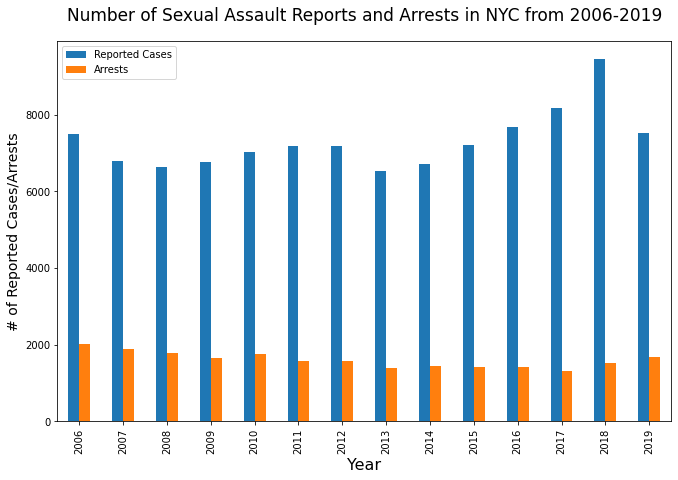

In [10]:
yearly_summary_df.plot(kind='bar', figsize=(11, 7))
plt.xlabel('Year', size=16)
plt.ylabel('# of Reported Cases/Arrests', size=14)
plt.title('Number of Sexual Assault Reports and Arrests in NYC from 2006-2019', size=17, pad=20)

Looking at this visualization, it's apparent that **compared to the number of sexual assault cases that are reported to the NYPD, there are very few arrests.** Even when reports peaked in 2018, the number of arrests stayed relatively similar to previous years.

### What is the ratio of sexual assault reports to sexual assault arrests?
1. Create a new column that divides complaint_count over arrests_count
2. Plot as line graph

In [11]:
yearly_summary_df['ratio'] = yearly_summary_df['Reported Cases'] / yearly_summary_df['Arrests']

In [12]:
yearly_summary_df

,Reported Cases,Arrests,ratio
start_date,,,
2006,7495,2028,3.695759
2007,6794,1889,3.596612
2008,6645,1780,3.733146
2009,6759,1647,4.103825
2010,7041,1769,3.980215
2011,7195,1584,4.542298
2012,7198,1571,4.581795
2013,6535,1404,4.654558
2014,6711,1437,4.670146


(0.0, 7.0)

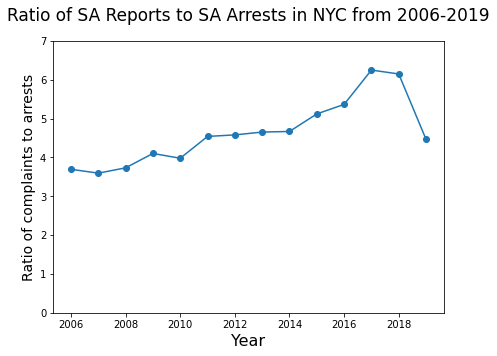

In [29]:
yearly_summary_df['ratio'].plot(kind='line', style='o-', figsize=(7, 5))
plt.title('Ratio of SA Reports to SA Arrests in NYC from 2006-2019', size=17, pad=20)
plt.xlabel('Year', size=16)
plt.ylabel('Ratio of complaints to arrests', size=14)
plt.ylim(0,7)

The ratio between reported cases to arrests steadily increased from 2006 to 2017. **At the peak in 2017, there were about 6 times more reports compared to arrests.** This ratio decreased significantly from 2018 to 2019, but the ratio in 2019 was still relatively high at around 4.5. 

### How do the type of offenses compare between the sexual assault reports and arrests?
1. Create a pd.series using .groupby for reported cases offenses and arrest offenses
2. Convert pd.series to a dataframe
3. Rename column
4. Merge dataframes
5. Transpose merged dataframe
6. Plot bar graph

In [14]:
complaint_offense = complaints_df.groupby('offense_desc').size()
arrest_offense = arrests_df.groupby('offense_desc').size()

In [15]:
arrest_offense_df = arrest_offense.to_frame()
arrest_offense_df.columns = ['Arrests']

In [16]:
complaint_offense_df = complaint_offense.to_frame()
complaint_offense_df.columns = ['Reported Cases']

In [17]:
complaint_arrest_offense_df = pd.merge(complaint_offense_df, arrest_offense_df, left_index=True, right_index=True)
complaint_arrest_offense_df = complaint_arrest_offense_df.T

Text(0.5, 1.0, 'Number of SA Reported Cases and Arrests (2006-2019) in NYC by Type of Offense')

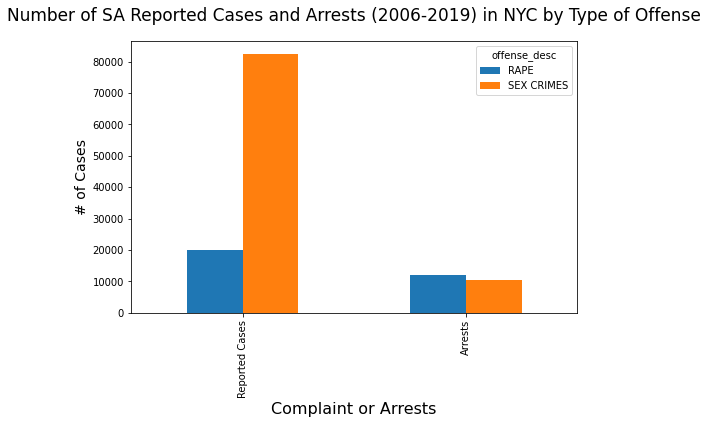

In [18]:
complaint_arrest_offense_df.plot(kind='bar', figsize=(8, 5))
plt.xlabel('Complaint or Arrests', size=16)
plt.ylabel('# of Cases', size=14)
plt.title('Number of SA Reported Cases and Arrests (2006-2019) in NYC by Type of Offense', size=17, pad=20)

**Among sexual assault arrests, there are relatively similar numbers of rape and sex crime arrests. However, among the reported cases, there are a lot more sex crime reports compared to rape reports.**

### How do the NYC borough locations compare between sexual assault reports and arrests?
1. Rename elements in arrest_borough column in arrests_df to match those in the borough column in complaints_df
2. Create a pd.series using .groupby for reported cases boroughs and arrest boroughs
3. Convert pd.series to a dataframe
4. Rename column
5. Merge dataframes
6. Transpose merged dataframe
7. Plot bar graph

In [19]:
arrests_df['arrest_borough']= arrests_df['arrest_borough'].replace({'K': 'BROOKLYN', 'Q': 'QUEENS', 'B': 'BRONX', 'M': 'MANHATTAN', 'S': 'STATEN ISLAND'})

In [20]:
complaint_borough = complaints_df.groupby('borough').size()
arrest_borough= arrests_df.groupby('arrest_borough').size()

In [21]:
complaint_borough_df = complaint_borough.to_frame()
complaint_borough_df.columns = ['Reported Cases']
arrest_borough_df = arrest_borough.to_frame()
arrest_borough_df.columns = ['Arrests']

In [22]:
complaint_arrest_borough_df = pd.merge(complaint_borough_df, arrest_borough_df, left_index=True, right_index=True)
complaint_arrest_borough_df = complaint_arrest_borough_df.T

Text(0.5, 1.0, 'Number of SA Reported Cases and Arrests (2006-2019) by NYC Borough')

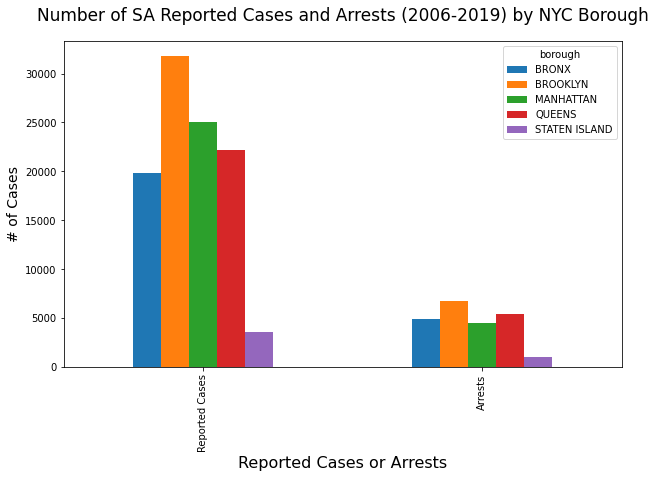

In [23]:
complaint_arrest_borough_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Reported Cases or Arrests', size=16)
plt.ylabel('# of Cases', size=14)
plt.title('Number of SA Reported Cases and Arrests (2006-2019) by NYC Borough', size=17, pad=20)

**For both reported cases and arrests, Brooklyn has the most cases and Staten Island has the least cases.** However, among the reported cases, the borough with the second highest number of cases is Manhattan, while among the arrests, the second highest is Queens. 

### How do the offense classifications compare between sexual assault complaints and arrests?
1. Rename divided classifications to the same overarching classification
2. Create a pd.series using .groupby for complaint offenses and arrest offenses
3. Convert pd.series to a dataframe
4. Rename column
5. Merge dataframes
6. Transpose merged dataframe
7. Plot bar graph


In [24]:
arrests_df['pd_desc']= arrests_df['pd_desc'].replace({'SEXUAL ABUSE 1': 'SEXUAL ABUSE', 
                                                      'OBSCENE MATERIAL - UNDER 17 YE': 'OBSCENE MATERIAL - UNDER 17 YEARS OF AGE',
                                                      'AGGRAVATED SEXUAL ASBUSE': 'AGGRAVATED SEXUAL ABUSE', 
                                                      'RAPE 1': 'RAPE',
                                                      'RAPE 2': 'RAPE',
                                                      'RAPE 3': 'RAPE',
                                                      'INCEST 1': 'INCEST',
                                                      'INCEST 3': 'INCEST',
                                                      'SODOMY 1': 'SODOMY',
                                                      'SODOMY 2': 'SODOMY',
                                                      'SODOMY 3': 'SODOMY',
                                                      'COURSE OF SEXUAL CONDUCT AGAIN' : 'COURSE OF SEXUAL CONDUCT AGAINST A CHILD',
                                                      'OBSCENITY 1': 'OBSCENITY'
                                                     })
complaints_df['pd_desc']= complaints_df['pd_desc'].replace({'SEXUAL ABUSE 3,2': 'SEXUAL ABUSE',
                                                         'OBSCENE MATERIAL - UNDER 17 YE': 'OBSCENE MATERIAL - UNDER 17 YEARS OF AGE',
                                                         'AGGRAVATED SEXUAL ASBUSE': 'AGGRAVATED SEXUAL ABUSE',
                                                         'RAPE 1': 'RAPE',
                                                         'RAPE 2': 'RAPE',
                                                         'RAPE 3': 'RAPE',
                                                         'RAPE 1,ATTEMPT': 'RAPE',
                                                         'INCEST 1': 'INCEST',
                                                         'INCEST 3': 'INCEST',
                                                         'SODOMY 1': 'SODOMY',
                                                         'SODOMY 2': 'SODOMY',
                                                         'SODOMY 3': 'SODOMY',
                                                         'SODOMY,CONSENSUAL': 'SODOMY',
                                                         'COURSE OF SEXUAL CONDUCT AGAIN' : 'COURSE OF SEXUAL CONDUCT AGAINST A CHILD',
                                                         'OBSCENITY 1': 'OBSCENITY',
                                                         'OBSCENITY, MATERIAL 3': 'OBSCENITY',
                                                         'OBSCENITY, PERFORMANCE 3': 'OBSCENITY'
                                                         })
                                                      

Text(0.5, 1.0, 'Number of SA Reported Cases and Arrests (2006-2019) in NYC by Offense Classification')

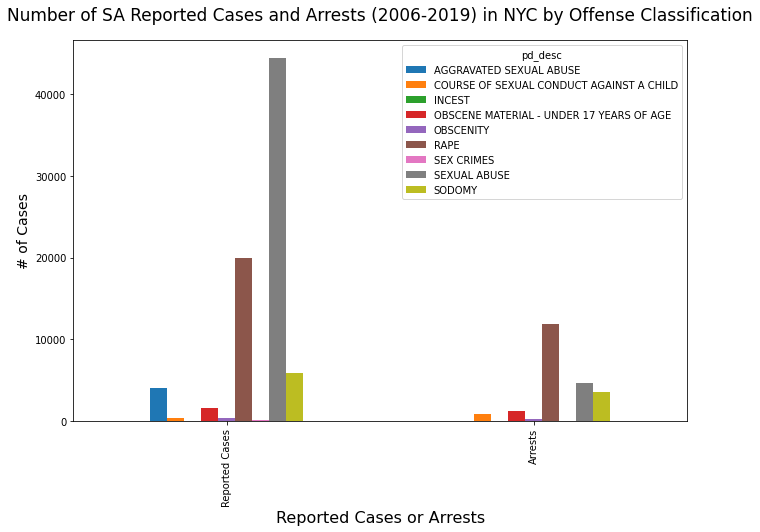

In [25]:
complaint_classif = complaints_df.groupby('pd_desc').size()
arrest_classif= arrests_df.groupby('pd_desc').size()

complaint_classif_df = complaint_classif.to_frame()
complaint_classif_df.columns = ['Reported Cases']
arrest_classif_df = arrest_classif.to_frame()
arrest_classif_df.columns = ['Arrests']

complaint_arrest_classif_df = pd.merge(complaint_classif_df, arrest_classif_df, left_index=True, right_index=True)
complaint_arrest_classif_df = complaint_arrest_classif_df.T

complaint_arrest_classif_df.plot(kind='bar', figsize=(11, 7))
plt.xlabel('Reported Cases or Arrests', size=16)
plt.ylabel('# of Cases', size=14)
plt.title('Number of SA Reported Cases and Arrests (2006-2019) in NYC by Offense Classification', size=17, pad=20)

This visualization shows that the **most common offense classification for reported cases is sexual abuse**, while the **most common offense classification for arrests is rape.**

### How do the demographics of the reported cases' suspects and the arrests' perpetrators compare?
1. Create a pd.series using .groupby for suspects and perpetrators
2. Convert pd.series to a dataframe
3. Rename column
4. Merge dataframes
5. Transpose merged dataframe
6. Plot bar graph

#### Comparison by Age

Text(0.5, 1.0, 'Number of SA Suspects and Perpetrators (2006-2019) in NYC by Age Group')

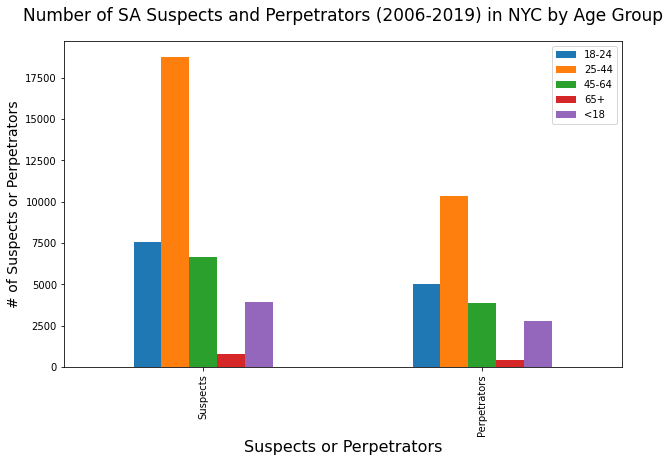

In [26]:
susp_age = complaints_df.groupby('suspect_age').size()
perp_age= arrests_df.groupby('perp_age').size()

susp_age_df = susp_age.to_frame()
susp_age_df.columns = ['Suspects']
perp_age_df = perp_age.to_frame()
perp_age_df.columns = ['Perpetrators']

susp_perp_age_df = pd.merge(susp_age_df, perp_age_df, left_index=True, right_index=True)
susp_perp_age_df = susp_perp_age_df.T

susp_perp_age_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Suspects or Perpetrators', size=16)
plt.ylabel('# of Suspects or Perpetrators', size=14)
plt.title('Number of SA Suspects and Perpetrators (2006-2019) in NYC by Age Group', size=17, pad=20)

**The distribution of age groups for complaint suspects and arrest perpetrators are incredibly similar.**

#### Comparison by Race

Text(0.5, 1.0, 'Number of SA Suspects and Perpetrators (2006-2019) in NYC by Race')

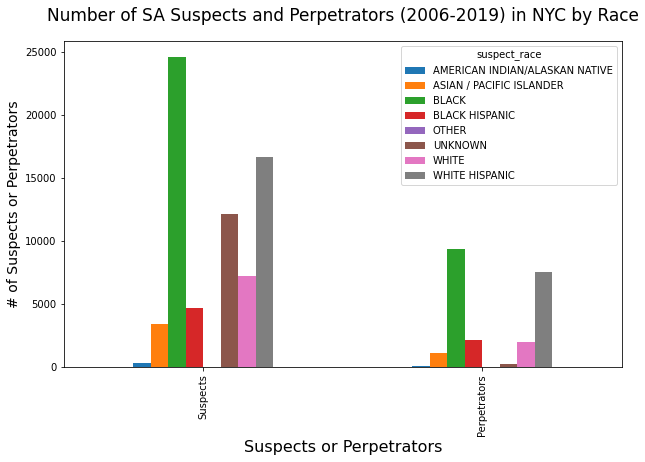

In [27]:
susp_race = complaints_df.groupby('suspect_race').size()
perp_race= arrests_df.groupby('perp_race').size()

susp_race_df = susp_race.to_frame()
susp_race_df.columns = ['Suspects']
perp_race_df = perp_race.to_frame()
perp_race_df.columns = ['Perpetrators']

susp_perp_race_df = pd.merge(susp_race_df, perp_race_df, left_index=True, right_index=True)
susp_perp_race_df = susp_perp_race_df.T

susp_perp_race_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Suspects or Perpetrators', size=16)
plt.ylabel('# of Suspects or Perpetrators', size=14)
plt.title('Number of SA Suspects and Perpetrators (2006-2019) in NYC by Race', size=17, pad=20)

Despite the reported cases' suspects having much more unknown data, **the most common race for suspects and perpetrators are Black and White Hispanics.**

#### Comparison by Sex

Text(0.5, 1.0, 'Number of SA Suspects and Perpetrators (2006-2019) in NYC by Sex (Binary)')

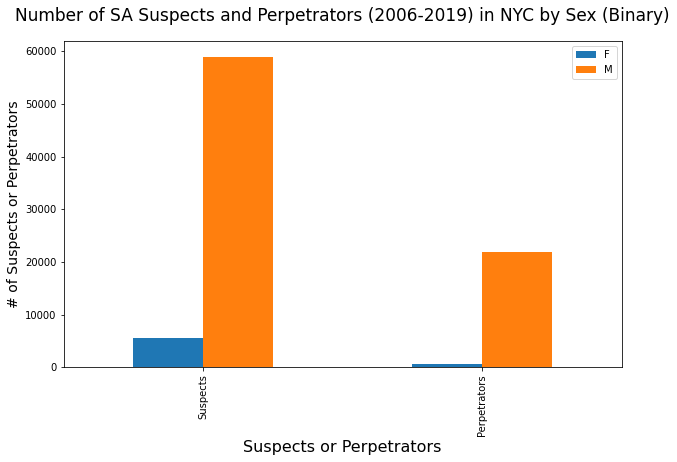

In [28]:
susp_sex = complaints_df.groupby('suspect_sex').size()
perp_sex= arrests_df.groupby('perp_sex').size()

susp_sex_df = susp_sex.to_frame()
susp_sex_df.columns = ['Suspects']
perp_sex_df = perp_sex.to_frame()
perp_sex_df.columns = ['Perpetrators']

susp_perp_sex_df = pd.merge(susp_sex_df, perp_sex_df, left_index=True, right_index=True)
susp_perp_sex_df = susp_perp_sex_df.T

susp_perp_sex_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Suspects or Perpetrators', size=16)
plt.ylabel('# of Suspects or Perpetrators', size=14)
plt.title('Number of SA Suspects and Perpetrators (2006-2019) in NYC by Sex (Binary)', size=17, pad=20)

**An overwhelming majority of both suspects and perpetrators of sexual assault in NYC are individuals who identify as male.**